<a href="https://colab.research.google.com/github/singh00in/AIML/blob/main/CrossValidations/Oversampling_and_undersampling_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context

Banks incur significant losses due to default in loans. This has led to a tightening up of loan underwriting and has increased loan rejection rates. The need for a better credit risk scoring model is also raised by banks.

The CNK bank has collected customer data for the past few years and wants to build a model to predict if a customer coming to purchase a loan is a good customer (will not default) or a bad customer (will default).

## Data Dictionary

- **Month** - the month of purchase
- **credit_amount** - amount for which loan is requested
- **credit_term** - for how long customer wants a loan
- **Age** - age of the customer
- **sex** - gender of the customer
- **education** - education level of customer
- **product_type** - for purchasing what type of product does the customer need a loan (0, 1, 2, 3, 4)
- **having_children_flg** - if the customer has children or not
- **region** - customer region category(0, 1, 2)
- **income** - income of the customer
- **family_status** - another, married, unmarried
- **phone_operator** - mobile operator category(0, 1, 2, 3)
- **is_client** - if the customer wanting to purchase a loan is our client or not
- **target** - 1-bad customer, 0-good customer

## Installing and Importing the Necessary Libraries

In [ ]:
# Installing the libraries with specific versions
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 imbalanced-learn==0.13.0 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# To help with reading and manipulation of data
import numpy as np
from numpy import array
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer

# To do one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# To build a decision tree model
from sklearn.tree import DecisionTreeClassifier

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)


# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Load and View the Dataset

In [16]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df = pd.read_csv("/content/drive/MyDrive/PG-AIML/Machine_Learning/Week3/Loanclients.csv")

In [18]:
data = df.copy()

In [ ]:
data.head()

,Month,credit_amount,credit_term,Age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,target
0,10,7000,6,25,0,Secondary special education,1,0,0,21000.0,1,0,0,0
1,10,19000,3,54,0,Secondary special education,3,1,1,17000.0,1,3,0,0
2,1,29000,2,36,0,Secondary special education,1,0,2,31000.0,1,2,0,0
3,11,10000,6,46,0,Secondary special education,0,1,1,31000.0,1,3,0,0
4,4,14500,4,39,0,Higher education,1,0,1,26000.0,1,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                1000 non-null   int64  
 1   credit_amount        1000 non-null   int64  
 2   credit_term          1000 non-null   int64  
 3   Age                  1000 non-null   int64  
 4   sex                  1000 non-null   int64  
 5   education            1000 non-null   object 
 6   product_type         1000 non-null   int64  
 7   having_children_flg  1000 non-null   int64  
 8   region               1000 non-null   int64  
 9   income               967 non-null    float64
 10  family_status        1000 non-null   int64  
 11  phone_operator       1000 non-null   int64  
 12  is_client            1000 non-null   int64  
 13  target               1000 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 109.5+ KB


In [ ]:
data.head()

,Month,credit_amount,credit_term,Age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,target
0,10,7000,6,25,0,Secondary special education,1,0,0,21000.0,1,0,0,0
1,10,19000,3,54,0,Secondary special education,3,1,1,17000.0,1,3,0,0
2,1,29000,2,36,0,Secondary special education,1,0,2,31000.0,1,2,0,0
3,11,10000,6,46,0,Secondary special education,0,1,1,31000.0,1,3,0,0
4,4,14500,4,39,0,Higher education,1,0,1,26000.0,1,0,0,0


#### Let's look at the pairplot of the data

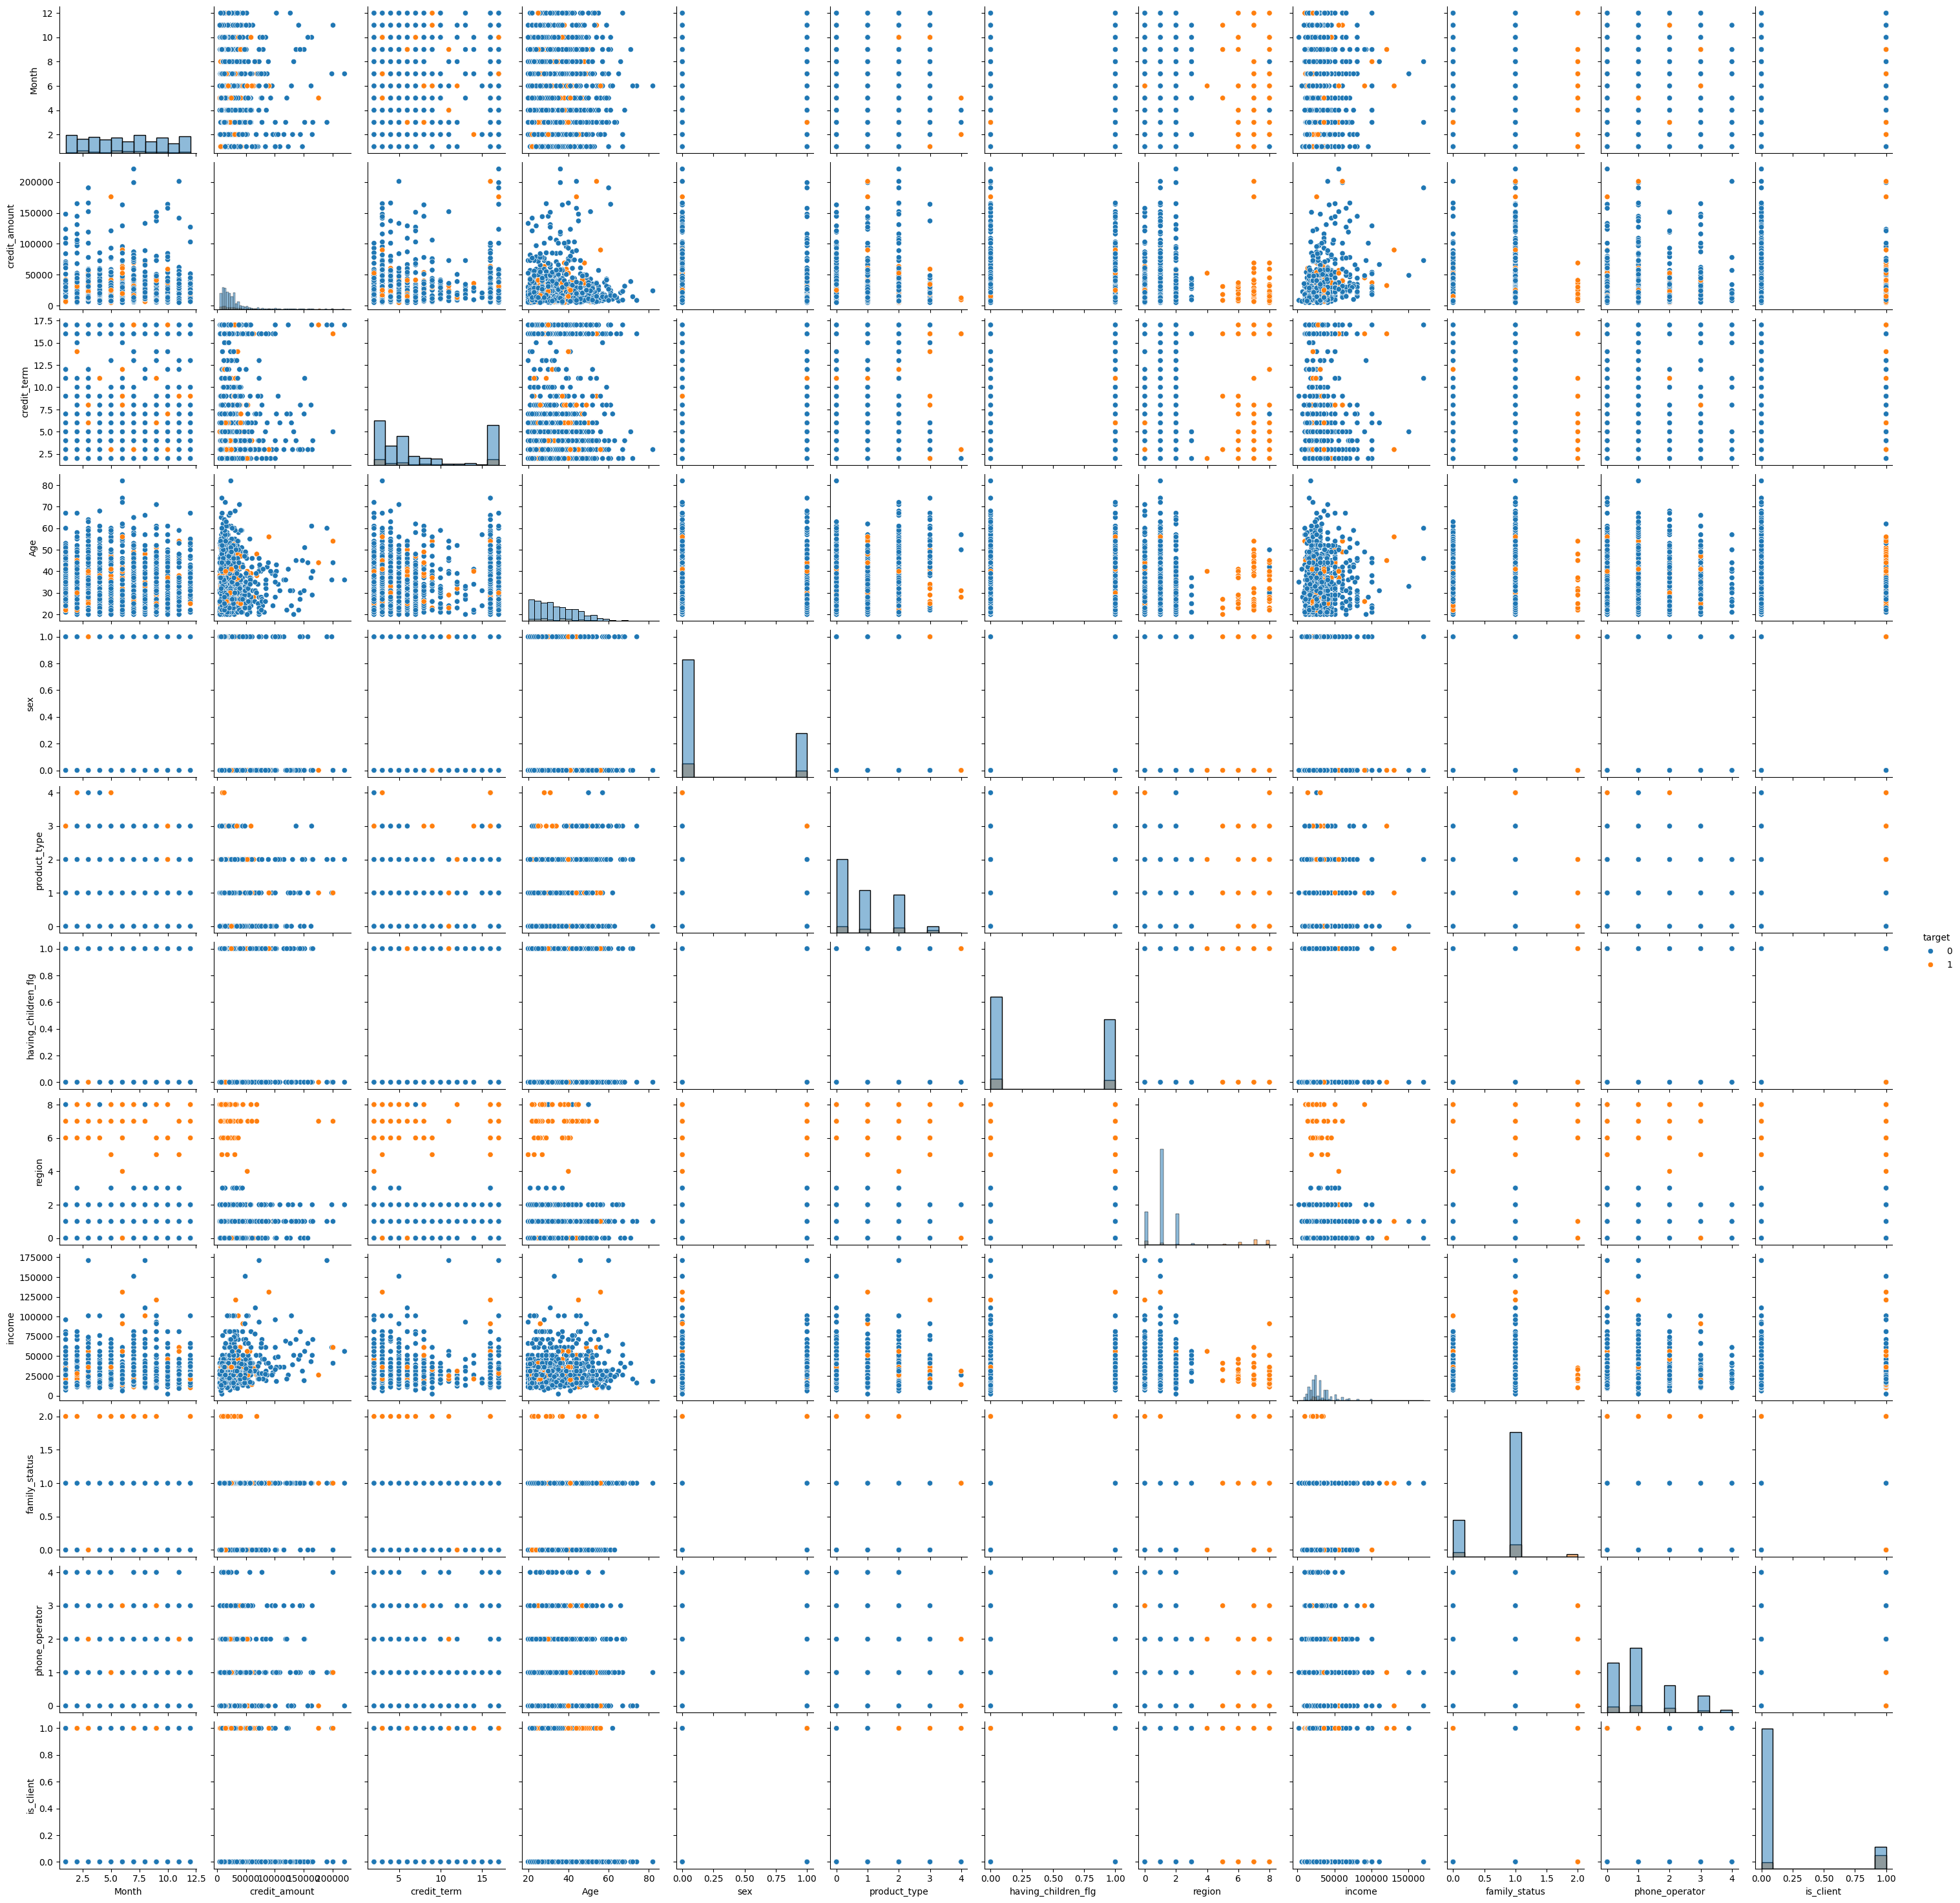

In [ ]:
sns.pairplot(data, hue = 'target' , diag_kind='hist')

In [19]:
# checking missing values in the data
data.isna().sum()

,0
Month,0
credit_amount,0
credit_term,0
Age,0
sex,0
education,0
product_type,0
having_children_flg,0
region,0
income,33


**The income variable has some missing values, we will impute them later**

In [20]:
data["phone_operator"] = data["phone_operator"].astype("category")
data["product_type"] = data["product_type"].astype("category")
data["education"] = data["education"].astype("category")

In [21]:
# checking the distribution of the target variable
data["target"].value_counts(1)

,proportion
target,
0,0.893
1,0.107


### Splitting the data into X and y

In [ ]:
# separating the independent and dependent variables
y = data["target"]
X = data.drop(["target"], axis=1)


# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

In [22]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(500, 23) (300, 23) (200, 23)


In [23]:
# Let's impute the missing values
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")

# fit the imputer on train data and transform the train data
X_train["income"] = imp_median.fit_transform(X_train[["income"]])

# transform the validation and test data using the imputer fit on train data
X_val["income"] = imp_median.transform(X_val[["income"]])
X_test["income"] = imp_median.transform(X_test[["income"]])

In [24]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
target
0    0.893
1    0.107
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
target
0    0.892
1    0.108
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
target
0    0.893333
1    0.106667
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
target
0    0.895
1    0.105
Name: proportion, dtype: float64
********************************************************************************


## Model evaluation criterion


**What does a bank want?**
* A bank wants to minimize the loss - it can face 2 types of losses here:
   * Whenever a bank lends money to a customer, they don't return it.
   * A bank doesn't lend money to a customer thinking a customer will default but in reality, the customer won't - opportunity loss.

**Which loss is greater ?**
* Lending to a customer who wouldn't be able to pay back.

**Since we want to reduce loan defaults we should use Recall as a metric of model evaluation instead of accuracy.**

* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a bad customer as a good customer.


## Let's train a decision tree and check it's performance

In [25]:
dtree = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with oversampled training set
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [26]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["imp"], index = X_train.columns))

                                               imp
Month                                     0.000000
credit_amount                             0.000000
credit_term                               0.018772
Age                                       0.000000
sex                                       0.000000
having_children_flg                       0.000000
region                                    0.656550
income                                    0.043484
family_status                             0.182609
is_client                                 0.078218
education_Incomplete higher education     0.000000
education_Incomplete secondary education  0.000000
education_PhD degree                      0.000000
education_Secondary education             0.000000
education_Secondary special education     0.000000
product_type_1                            0.000000
product_type_2                            0.000000
product_type_3                            0.001595
product_type_4                 

#### We have trained the model, Let's check the performance on the oversampled train and validation sets

In [27]:
# Predicting the target for train and validation set
pred_train = dtree.predict(X_train)
pred_val = dtree.predict(X_val)

In [28]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train, pred_train))
print(recall_score(y_val, pred_val))

0.8333333333333334
0.5


In [30]:
# Checking accuracy score on oversampled train and validation set
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_val, pred_val))

0.982
0.9466666666666667


- Accuracy of the model is good but the metric of interest in Recall here.
- The model's recall score is poor for both train and validation sets.

- Let's try oversampling and undersampling techniques to see if recall improves.

# Oversampling and Undersampling the train data

## Oversampling train data using SMOTE

In [32]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique) // k_neighbors means SMOTE will look for 5 neighbor to generate
#syntatic data for case of oversampling
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [33]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 54
Before OverSampling, count of label '0': 446 

After OverSampling, count of label '1': 178
After OverSampling, count of label '0': 446 

After OverSampling, the shape of train_X: (624, 23)
After OverSampling, the shape of train_y: (624,) 



#### Let's train a decision tree classifier using the oversampled data

In [40]:
dtree1 = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with oversampled training set
dtree1.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, random_state=1)

#### We have trained the model, Let's check the performance on the oversampled train and validation sets

In [41]:
# Predicting the target for train and validation set
pred_train = dtree1.predict(X_train_over)
pred_val = dtree1.predict(X_val)

In [43]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.8314606741573034
0.6875


In [37]:
# Checking accuracy score on oversampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

0.9423076923076923
0.9466666666666667


#### After checking the performance, let's look at the confusion matrices of the train and validation data

Text(58.222222222222214, 0.5, 'Actual Values')

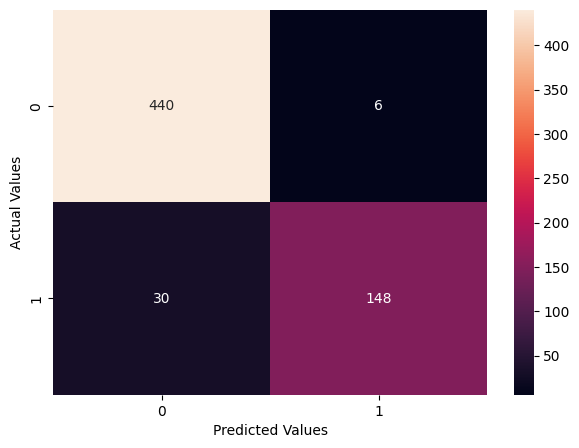

In [38]:
# Confusion matrix for oversampled train data
cm = confusion_matrix(y_train_over, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")


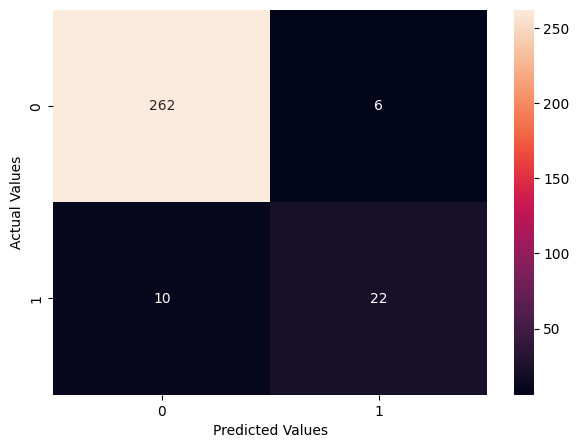

In [39]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

* We can see that the model with oversampled data has improved the train recall from 57% to 92% and 50% to 84% on the validation data
* There is a little overfitting in the results which can be handled separately by using regularization techniques.

## Undersampling train data using Random Undersampler

In [44]:
# fit random under sampler on the train data // sampling strategy 1 means defaulter and non- defaulter  to 1:1
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [45]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 54
Before Under Sampling, count of label '0': 446 

After Under Sampling, count of label '1': 54
After Under Sampling, count of label '0': 54 

After Under Sampling, the shape of train_X: (108, 23)
After Under Sampling, the shape of train_y: (108,) 



#### Let's train a decision tree classifier using the undersampled data

In [46]:
dtree2 = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with oversampled training set
dtree2.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=4, random_state=1)

#### We have trained the model, let's check the performance on undersampled train and validation data

In [47]:
# Predicting the target for train and validation set
pred_train = dtree2.predict(X_train_un)
pred_val = dtree2.predict(X_val)

In [48]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_un, pred_train))
print(recall_score(y_val, pred_val))

0.9074074074074074
0.90625


In [49]:
# Checking accuracy score on undersampled train and validation set
print(accuracy_score(y_train_un, pred_train))
print(accuracy_score(y_val, pred_val))

0.9537037037037037
0.95


#### After checking the performance, let's look at the confusion matrices of the train and validation data

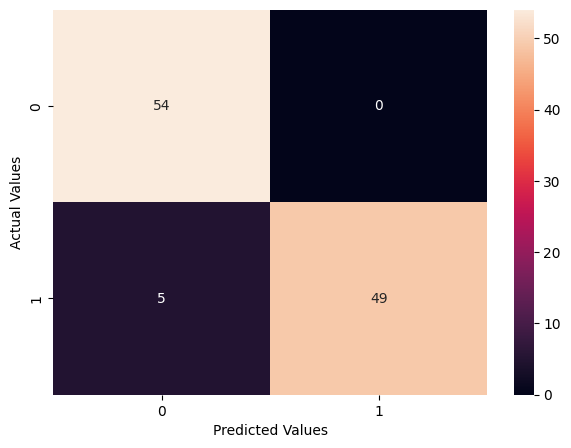

In [50]:
# Confusion matrix for undersampled train data
cm = confusion_matrix(y_train_un, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

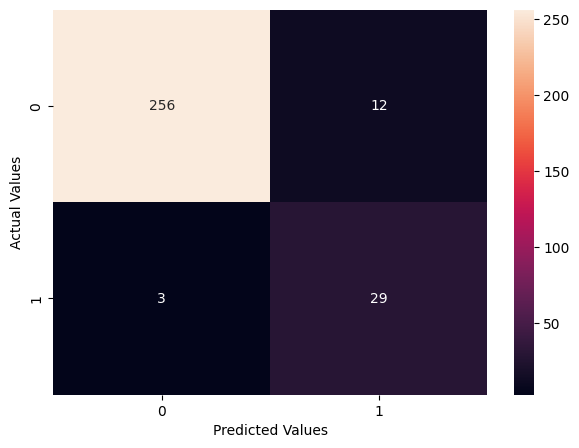

In [51]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

- We can see that the model with undersampled data has improved the train recall from 57% to 88%  and 50% to 84% on the validation data, but the accuracy decreases.

#### We can see that the model trained with undersampled data has better performance, so let's now check the performance of dtree2 using the test data

0.8095238095238095


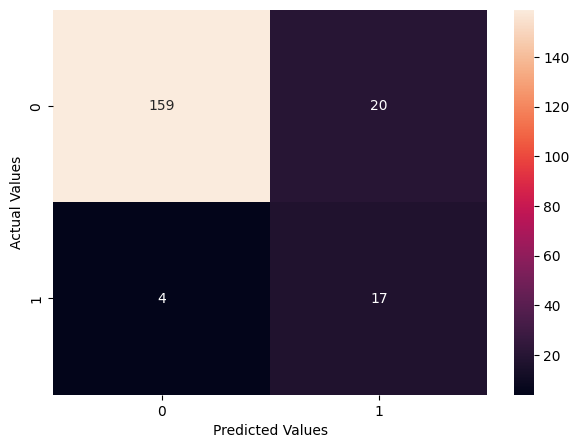

In [52]:
# Now we have identified the best model, let's check its performance on test set
print(recall_score(y_test, dtree2.predict(X_test)))

cm = confusion_matrix(y_test, dtree2.predict(X_test))
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

* The recall score for the best model on the test data is ~80%

**Further performance can be improved by using hyperparameter tuning**

Note : as we are having some good feature (Column in Dataset) like Region, Family which are having higher importance  hence then there oversamling or undersamling worked perfectly